# **Install & Import Libraries**

In [64]:
# Install necessary packages (if needed)
# !pip install -q pandas numpy matplotlib seaborn scikit-learn

# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# **Load Dataset**

In [65]:
# Upload file if running in Colab
# from google.colab import files
# uploaded = files.upload()

# Load the CSV file
df = pd.read_csv("./content/cybersecurity_breach_dataset.csv")
df.head()


,Organization,Industry,Breach_Type,Records_Compromised,Detection_Days,Total_Cost_USD,Compliance_Standard,Breach_Year,Industry_encoded,Breach_Type_encoded,Compliance_encoded,High_Cost
0,Guzman and Sons,Education,Credential Theft,687350,149,444321,CCPA,2016,0,0,0,0
1,Walker-Huffman,Technology,DDoS,151194,149,626672,PCI-DSS,2022,5,1,3,1
2,"Waters, Cowan and Grimes",Retail,Credential Theft,910161,126,191841,CCPA,2017,4,0,0,0
3,"Lynch, Oneal and Mills",Technology,Credential Theft,970183,302,473496,SOX,2021,5,0,4,0
4,Nelson and Sons,Technology,Malware,594704,360,515779,NaN,2019,5,3,5,1


C:\Users\HP\AppData\Local\Temp\ipykernel_12568\2372987716.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Records_Compromised', y='Breach_Type', inner='box', palette='Dark2')


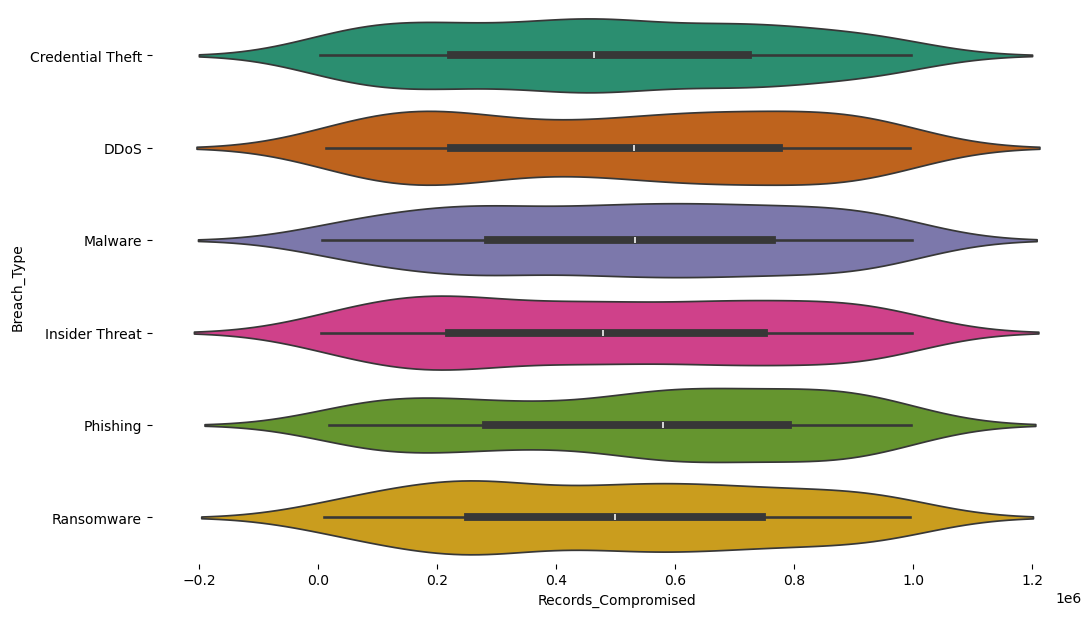

In [66]:
# @title Breach_Type vs Records_Compromised

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Breach_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Records_Compromised', y='Breach_Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

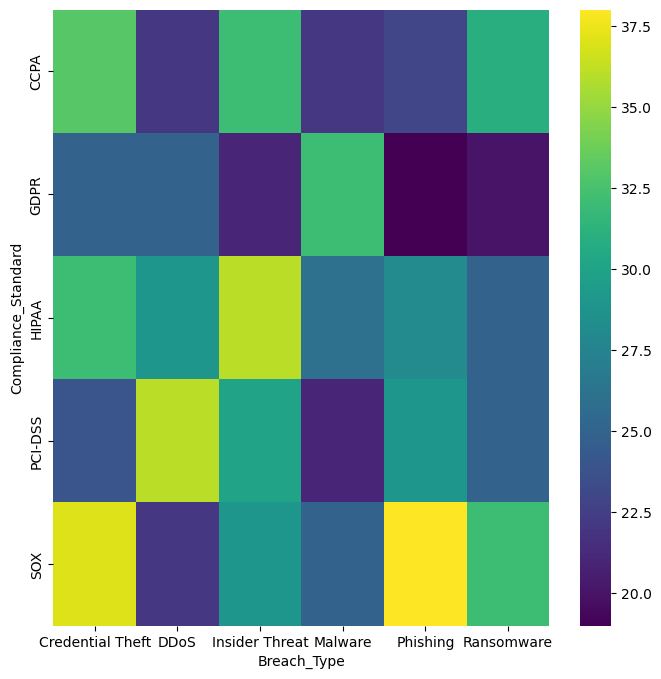

In [67]:
# @title Breach_Type vs Compliance_Standard

from matplotlib import pyplot as plt
import seaborn as sns
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Compliance_Standard'].value_counts()
    for x_label, grp in df.groupby('Breach_Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Breach_Type')
_ = plt.ylabel('Compliance_Standard')

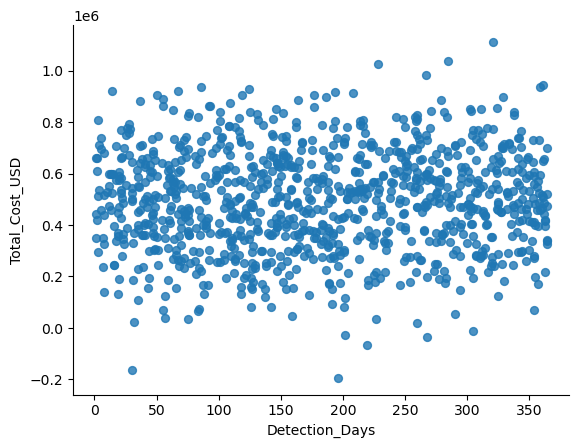

In [68]:
# @title Detection_Days vs Total_Cost_USD

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Detection_Days', y='Total_Cost_USD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

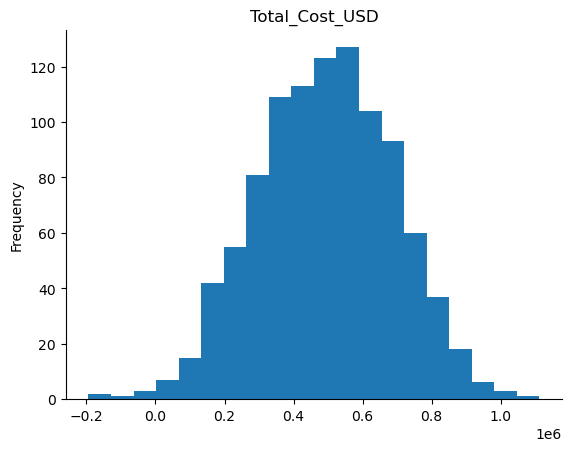

In [69]:
# @title Total_Cost_USD

from matplotlib import pyplot as plt
df['Total_Cost_USD'].plot(kind='hist', bins=20, title='Total_Cost_USD')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [70]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df)

# **Basic EDA (Exploratory Data Analysis)**

In [71]:
# Shape and info
print("Dataset shape:", df.shape)
df.info()

# Null values
print("\nMissing values:\n", df.isnull().sum())




Dataset shape: (1000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Organization         1000 non-null   object
 1   Industry             1000 non-null   object
 2   Breach_Type          1000 non-null   object
 3   Records_Compromised  1000 non-null   int64 
 4   Detection_Days       1000 non-null   int64 
 5   Total_Cost_USD       1000 non-null   int64 
 6   Compliance_Standard  829 non-null    object
 7   Breach_Year          1000 non-null   int64 
 8   Industry_encoded     1000 non-null   int64 
 9   Breach_Type_encoded  1000 non-null   int64 
 10  Compliance_encoded   1000 non-null   int64 
 11  High_Cost            1000 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 93.9+ KB

Missing values:
 Organization             0
Industry                 0
Breach_Type              0
Records_Compromised      0
Detec

In [72]:
# Descriptive statistics
df.describe()



,Records_Compromised,Detection_Days,Total_Cost_USD,Breach_Year,Industry_encoded,Breach_Type_encoded,Compliance_encoded,High_Cost
count,1000.000000,1000.000000,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000
mean,504171.322000,181.130000,4.934071e+05,2019.54600,2.493000,2.474000,2.576000,0.50000
std,292011.271015,104.450337,1.957074e+05,2.92103,1.721893,1.721711,1.703269,0.50025
min,3291.000000,1.000000,-1.942850e+05,2015.00000,0.000000,0.000000,0.000000,0.00000
25%,234662.500000,91.000000,3.589048e+05,2017.00000,1.000000,1.000000,1.000000,0.00000
50%,510771.000000,175.500000,5.001820e+05,2020.00000,3.000000,2.000000,3.000000,0.50000
75%,755557.500000,270.250000,6.326188e+05,2022.00000,4.000000,4.000000,4.000000,1.00000
max,997958.000000,364.000000,1.112389e+06,2024.00000,5.000000,5.000000,5.000000,1.00000


In [84]:
df.head()

,Organization,Industry,Breach_Type,Records_Compromised,Detection_Days,Total_Cost_USD,Compliance_Standard,Breach_Year,Industry_encoded,Breach_Type_encoded,Compliance_encoded,High_Cost
0,Guzman and Sons,Education,Credential Theft,687350,149,444321,CCPA,2016,0,0,0,0
1,Walker-Huffman,Technology,DDoS,151194,149,626672,PCI-DSS,2022,5,1,3,1
2,"Waters, Cowan and Grimes",Retail,Credential Theft,910161,126,191841,CCPA,2017,4,0,0,0
3,"Lynch, Oneal and Mills",Technology,Credential Theft,970183,302,473496,SOX,2021,5,0,4,0
4,Nelson and Sons,Technology,Malware,594704,360,515779,NaN,2019,5,3,5,1


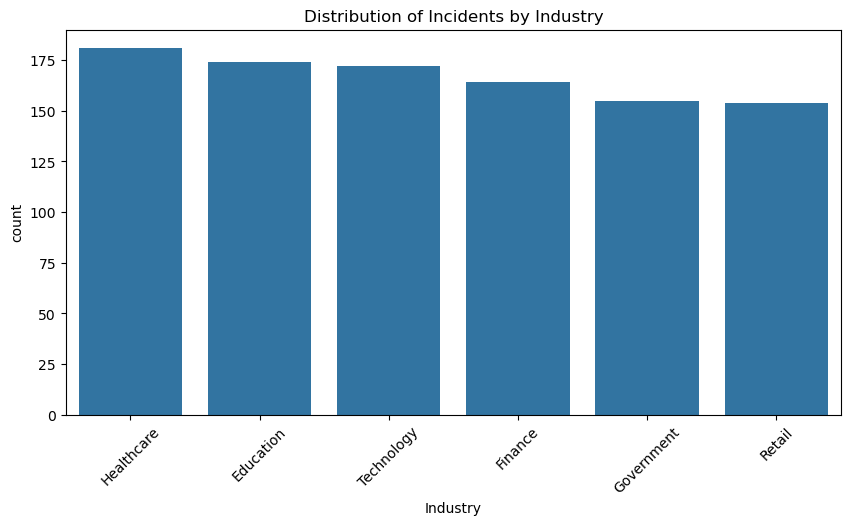

In [73]:
# Industry distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Industry", order=df["Industry"].value_counts().index)
plt.title("Distribution of Incidents by Industry")
plt.xticks(rotation=45)
plt.show()



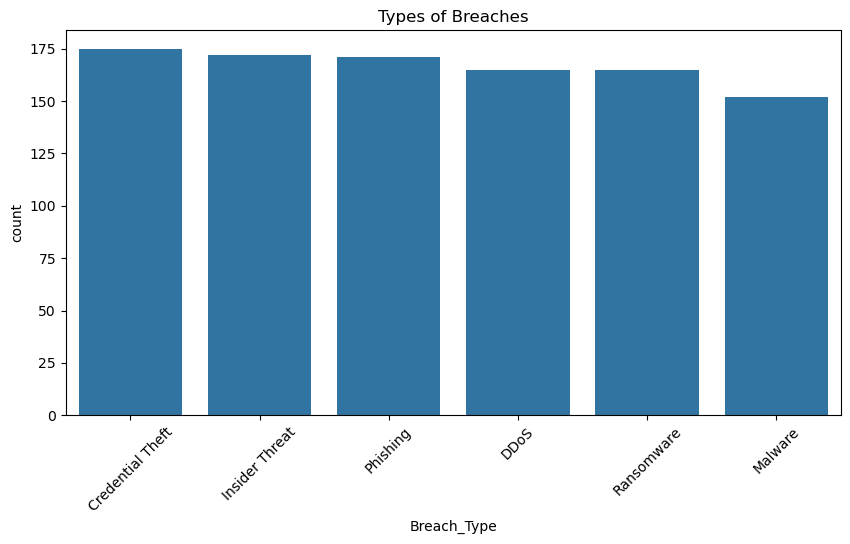

In [74]:
# Breach type frequency
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Breach_Type", order=df["Breach_Type"].value_counts().index)
plt.title("Types of Breaches")
plt.xticks(rotation=45)
plt.show()



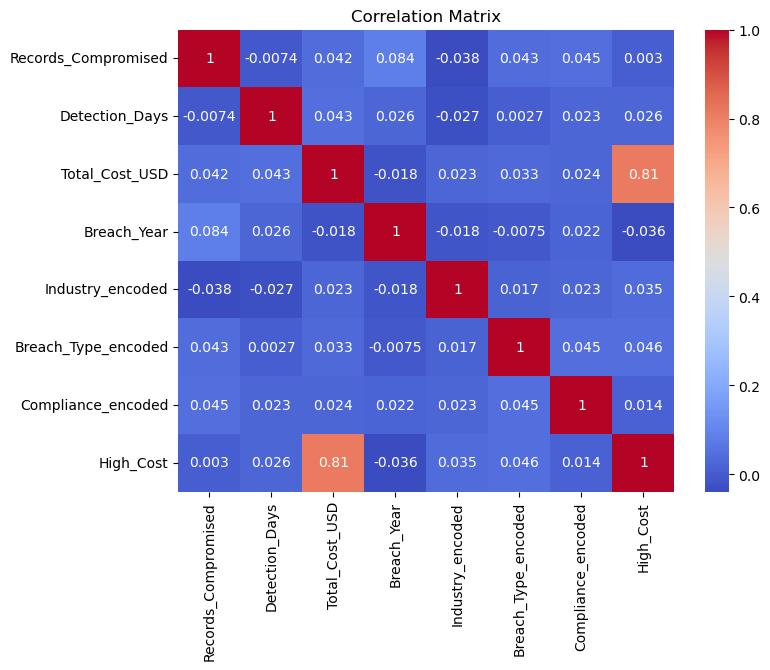

In [75]:
# Correlation heatmap for numeric columns
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# **Data Preprocessing**

In [76]:
# Encode categorical features
le = LabelEncoder()
df['Industry_encoded'] = le.fit_transform(df['Industry'])
df['Breach_Type_encoded'] = le.fit_transform(df['Breach_Type'])
df['Compliance_encoded'] = le.fit_transform(df['Compliance_Standard'])

# Drop original non-numeric columns (except Organization for now)
df_model = df.drop(['Organization', 'Industry', 'Breach_Type', 'Compliance_Standard'], axis=1)

# Define features and target (predicting if breach is 'High Cost' or not)
df_model['High_Cost'] = (df_model['Total_Cost_USD'] > df_model['Total_Cost_USD'].median()).astype(int)
X = df_model.drop(['Total_Cost_USD', 'High_Cost'], axis=1)
y = df_model['High_Cost']


# **Train/Test Split and Scaling**

In [77]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Logistic Regression Model**

In [78]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Report
              precision    recall  f1-score   support

           0       0.50      0.56      0.53        94
           1       0.56      0.49      0.52       106

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.53      0.53      0.52       200



# **Random Forest Model**

Random Forest Report
              precision    recall  f1-score   support

           0       0.50      0.61      0.55        94
           1       0.56      0.45      0.50       106

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.53      0.53      0.52       200



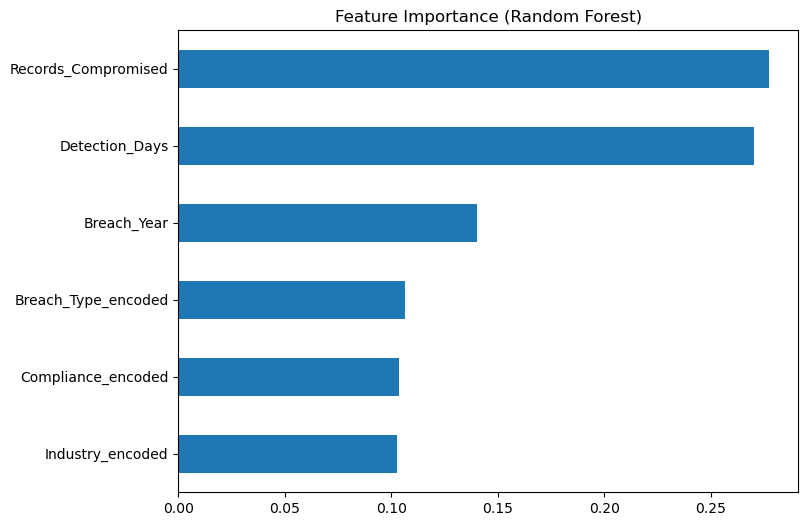

In [79]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))

# Feature importance
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh', title="Feature Importance (Random Forest)", figsize=(8,6))
plt.show()


# **Predict on New Data**

In [80]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Encode categorical columns
le_industry = LabelEncoder()
le_breach = LabelEncoder()
le_compliance = LabelEncoder()

df['Industry_encoded'] = le_industry.fit_transform(df['Industry'])
df['Breach_Type_encoded'] = le_breach.fit_transform(df['Breach_Type'])
df['Compliance_encoded'] = le_compliance.fit_transform(df['Compliance_Standard'])

# Create target variable: 1 = High Cost, 0 = Low Cost (based on median)
df['High_Cost'] = (df['Total_Cost_USD'] > df['Total_Cost_USD'].median()).astype(int)

# Select features
X = df[['Records_Compromised', 'Detection_Days', 'Industry_encoded',
        'Breach_Type_encoded', 'Compliance_encoded', 'Breach_Year']]
y = df['High_Cost']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prepare new realistic prediction input
new_input = pd.DataFrame([{
    'Records_Compromised': 250000,
    'Detection_Days': 80,
    'Industry_encoded': le_industry.transform(['Finance'])[0],
    'Breach_Type_encoded': le_breach.transform(['Phishing'])[0],
    'Compliance_encoded': le_compliance.transform(['GDPR'])[0],
    'Breach_Year': 2023
}])

# Align column order
new_input = new_input[X.columns]
new_input_scaled = scaler.transform(new_input)

# Predictions
lr_pred = lr_model.predict(new_input_scaled)[0]
lr_prob = lr_model.predict_proba(new_input_scaled)[0]

rf_pred = rf_model.predict(new_input)[0]
rf_prob = rf_model.predict_proba(new_input)[0]

# Output
print("Logistic Regression Prediction:", "High Cost" if lr_pred else "Low Cost")
print("Random Forest Prediction:", "High Cost" if rf_pred else "Low Cost")


Logistic Regression Prediction: Low Cost
Random Forest Prediction: Low Cost


# **Visualize Prediction Probabilities**

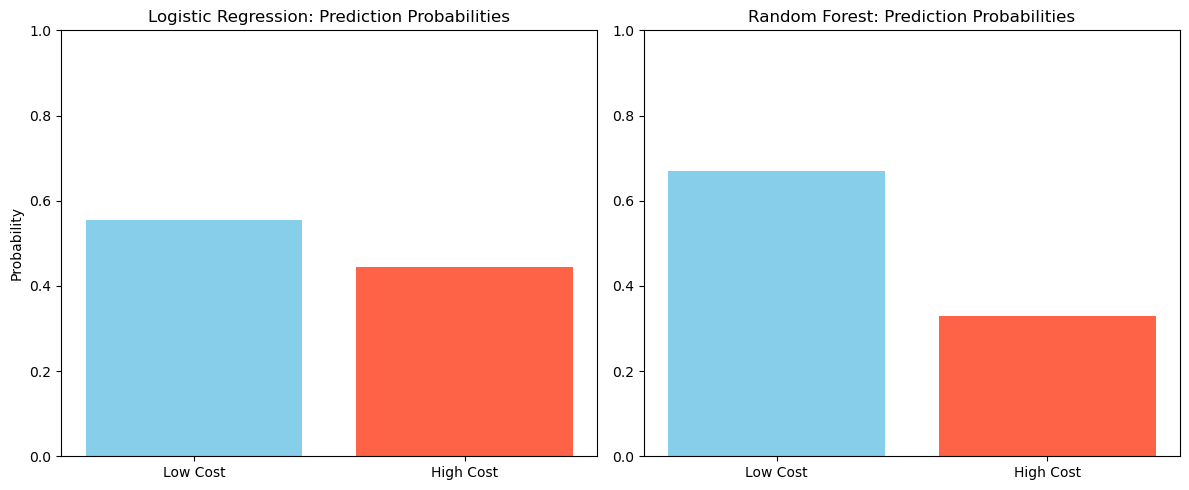

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Logistic Regression
plt.subplot(1, 2, 1)
plt.bar(['Low Cost', 'High Cost'], lr_prob, color=['skyblue', 'tomato'])
plt.title('Logistic Regression: Prediction Probabilities')
plt.ylim(0, 1)
plt.ylabel("Probability")

# Random Forest
plt.subplot(1, 2, 2)
plt.bar(['Low Cost', 'High Cost'], rf_prob, color=['skyblue', 'tomato'])
plt.title('Random Forest: Prediction Probabilities')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


# **SHAP Explanation & Export CSV**

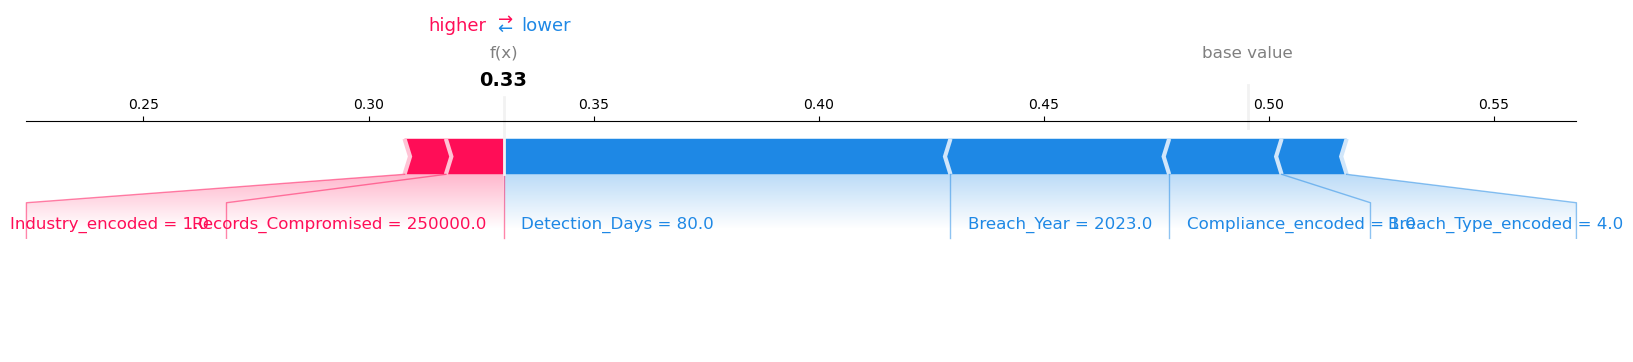

In [82]:


import shap

# Create SHAP explainer and values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(new_input)

# Extract the SHAP values for the 'High Cost' class (class 1)
shap_values_class1 = shap_values[0, :, 1]

# Display force plot
shap.initjs()
shap.plots.force(
    base_value=explainer.expected_value[1],  # class 1 baseline
    shap_values=shap_values_class1,          # 1D array for class 1
    features=new_input.iloc[0],              # Feature values
    feature_names=new_input.columns.tolist(),
    matplotlib=True
)


In [83]:
# Create a result summary
import pandas as pd

prediction_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Prediction': ['High Cost' if lr_pred else 'Low Cost', 'High Cost' if rf_pred else 'Low Cost'],
    'Low_Cost_Prob': [lr_prob[0], rf_prob[0]],
    'High_Cost_Prob': [lr_prob[1], rf_prob[1]]
})

# Save as CSV
prediction_summary.to_csv("./content/prediction_summary.csv", index=False)

# # Trigger download in Colab

# files.download("/content/prediction_summary.csv")
